# Machine Learning - SS18

Ludwig-Maximilians-Universität München
* Lecturer: Prof. Dr. Volker Tresp
* Assistant: Christian Frey, Julian Busch
* Tutor: Ou Changkun < hi@changkun.us >

# Exercise 7-1 - 06/14/18

In [1]:
import pandas as pd

# Read data
df = pd.read_csv('body_sizes.txt',
                 sep='\t',
                 usecols=['sizes1', 'sizes2', 'sizes3', 'sizes4'])

In [2]:
# Get summary statistics
df.describe()

,sizes1,sizes2,sizes3,sizes4
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,173.783036,174.227232,172.332143,179.494643
std,21.639135,16.516714,17.731420,18.953057
min,85.000000,85.000000,85.000000,69.000000
25%,164.000000,167.000000,165.000000,171.000000
50%,178.000000,176.000000,175.000000,181.000000
75%,188.000000,184.000000,183.000000,191.000000
max,250.000000,229.000000,226.000000,249.000000


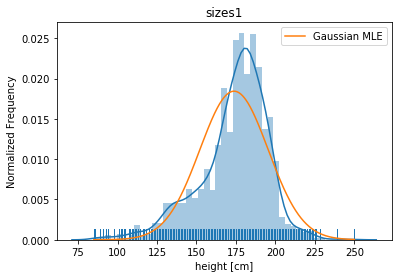

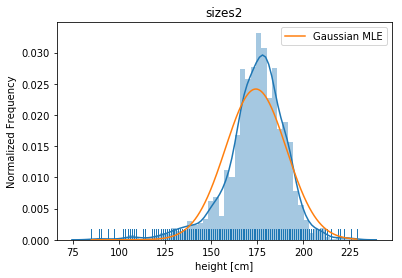

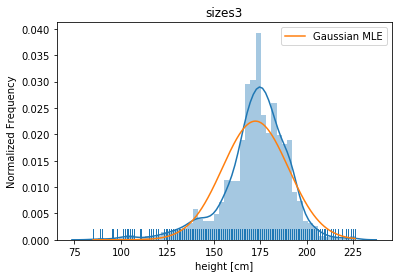

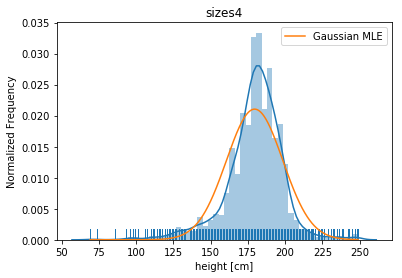

In [3]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for col in df.columns:
    data = df[col]

    # Plot histogram, kernel density estimation and individual points
    plt.figure()
    ax = sns.distplot(data, rug=True, axlabel='height [cm]')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(col)

    # Plot maximum likelihood estimated Gaussian
    xx = np.arange(data.min(), data.max(), 0.001)
    yy = norm.pdf(xx, data.mean(), data.std())
    ax.plot(xx, yy, label='Gaussian MLE')
    ax.legend()
    #plt.savefig('distplot_' + col)

# Exercise 7-4

In [12]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [98]:
# data
X = np.array([
    [1, 0],
    [2, 0],
    [3, 0],
    [5, 6],
    [6, 6],
    [7, 6]
])
reduced_dimension = 1
print("Original space: ", X.shape[1])
print("Target space: ", reduced_dimension)

Original space:  2
Target space:  1


## **Step 1**: Calculate $\mu$

Increased dimension matrix of the mean vecor of $X$

In [99]:
mu = np.repeat(np.mean(X, axis=0)[np.newaxis, :], X.shape[0], 0)
print(f"mu is: \n{mu}")

mu is: 
[[ 4.  3.]
 [ 4.  3.]
 [ 4.  3.]
 [ 4.  3.]
 [ 4.  3.]
 [ 4.  3.]]


## Step 2: Calculate $\widetilde{X} = X - \mu$

In [100]:
X_wave = X - mu
print(f"X wave: \n{X_wave}")

X wave: 
[[-3. -3.]
 [-2. -3.]
 [-1. -3.]
 [ 1.  3.]
 [ 2.  3.]
 [ 3.  3.]]


## Step 3: Calculate $COV(x) \approx \hat{\Sigma} = \frac{1}{N}{\widetilde{X}^T\widetilde{X}}$

In [101]:
Sigma_hat = (1 / X.shape[0]) * np.dot(np.transpose(X_wave), X_wave)
print(f"Sigma hat: \n{Sigma_hat}")

Sigma hat: 
[[ 4.66666667  6.        ]
 [ 6.          9.        ]]


## Step 4: Calculate eigenpairs

The eigenvalue and eigenvectors of $\hat{\Sigma}$

In [102]:
eigen_value, eigen_vectors = LA.eig(Sigma_hat)
print(f"eigen value: \n{eigen_value}")
print(f"eigen vectors:\n{eigen_vectors}")

eigen value: 
[  0.4541136   13.21255307]
eigen vectors:
[[-0.81842668 -0.57461097]
 [ 0.57461097 -0.81842668]]


## Step 5: Prepare $U$

The corresponding eigenvectors of the largest number of target dimension eigenvalues

In [103]:
U = eigen_vectors[:, -reduced_dimension:]
print(f"U: \n{U}")

U: 
[[-0.57461097]
 [-0.81842668]]


## Step 6: Calculate $Y = \widetilde{X}U $

In [104]:
Y =  np.dot(X_wave, U)
print(f"Y: \n{Y}")

Y: 
[[ 4.17911296]
 [ 3.60450198]
 [ 3.02989101]
 [-3.02989101]
 [-3.60450198]
 [-4.17911296]]


## Step 7: Calculate $\hat{X} = \mu + \widetilde{X} U U^T$

In [105]:
X_hat = mu + np.dot(X_wave, np.dot(U, U.T))
print(f"X hat: \n{X_hat}")

X hat: 
[[ 1.59863585 -0.42029755]
 [ 1.92881361  0.0499794 ]
 [ 2.25899138  0.52025635]
 [ 5.74100862  5.47974365]
 [ 6.07118639  5.9500206 ]
 [ 6.40136415  6.42029755]]


## Extra: Visualize $\hat{X}$

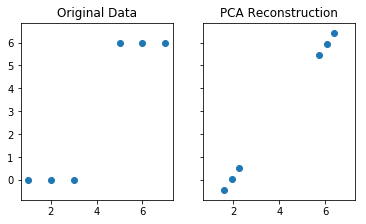

In [106]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Original Data')
ax1.set(adjustable='box-forced', aspect='equal')
ax2.scatter(X_hat[:, 0], X_hat[:, 1])
ax2.set_title('PCA Reconstruction')
ax2.set(adjustable='box-forced', aspect='equal')
plt.show()